# Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from sympy import *
from numpy import linalg as LA 
import time
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [5]:
data_base = pd.read_excel("/content/gdrive/MyDrive/Ангелина Гусева данные.xls")

In [6]:
Y = data_base.y
x_cols = data_base.columns[1:]
X = data_base[x_cols]

In [7]:
X = np.array(X)
Y = np.reshape(np.array(Y), (289,1))

In [8]:
def printform(a):
  a = a*1000000//1000/1000
  return pd.DataFrame(a)

# Метод Гаусса

In [ ]:
def Gauss(X, Y):

    B= np.zeros((7,1))
    
    G = np.concatenate((X,Y), axis=1)

    n ,a = np.shape(X) 

    for i in range(a):
      G[i,:] /= G[i,i]
      for j in range(n-1-i):
        G[j+1+i,:] -= (G[i,:]*G[j+1+i,i])

    X1 = np.array(G[:,0:7])
    Y1 = np.array(G[:,7:8])

    for i in range (7):

        for j in range(i):
          Y1[6-i,0]-=X1[6-i,6-j]*B[6-j]

        B[6-i] = Y1[6-i,0]/X1[6-i,6-i]

    return B

In [ ]:
def predict_Gauss(X,B):
  return X @ B

In [ ]:
def measure_e_Gauss(Y,y):
  return Y-y

In [ ]:
a1 = time.time()

B_gauss = Gauss(X,Y)
y_pred_gauss = predict_Gauss(X,B_gauss)
E_gauss = measure_e_Gauss(Y,y_pred_gauss)

TotalTime_Gauss = time.time() - a1

In [ ]:
printform(B_gauss)

,0
0,-216995.899
1,217304.514
2,12859.126
3,-5501.319
4,-14884.505
5,3139.348
6,7939.506


In [ ]:
printform(E_gauss)

,0
0,-0.001
1,-0.001
2,-0.001
3,-0.001
4,-0.001
...,...
284,7804.128
285,7847.488
286,7911.451
287,7915.583


In [ ]:
print("Time = ", TotalTime_Gauss)

Time =  0.011199235916137695


# Метод Грамма-Шмидта

In [ ]:
def Shmidt(X,Y):

  n, a = np.shape(X)
  X_ort = np.zeros((n,a))
  
  for i in range(n):
    X_ort[i,:] = X[i,:] 
    for j in range(i):
      X_ort[i,:] -= (X[i,:] @ np.transpose(X_ort[j,:])) /(X_ort[j,:] @ np.transpose(X_ort[j,:])) *X_ort[j,:]

    X_ort[i,:]/=np.sqrt(X_ort[i,:]@ np.transpose(X_ort[i,:]))

  B = np.dot(np.transpose(X_ort),Y)

  return B

In [ ]:
def predict_y_Shmidt(X,B):
  return X @ B

In [ ]:
def e_measure_Shmidt(Y,y):
  return Y-y

In [ ]:
a1 = time.time()

B_shmidt = Shmidt(X,Y)
y_pred_shmidt = predict_y_Shmidt(X,B_shmidt)
E_shmidt = e_measure_Shmidt(Y,y_pred_shmidt)

a2 = time.time()

TotalTime_Shmidt = a2 - a1

In [ ]:
printform(B_shmidt)

,0
0,-54060.222
1,247258.241
2,1022795.143
3,-930445.355
4,48532.195
5,-227476.694
6,-154325.775


In [ ]:
printform(E_shmidt)

,0
0,-254.902
1,-224.866
2,-139.724
3,-253.173
4,-263.607
...,...
284,11320.698
285,12210.784
286,13801.737
287,13187.496


In [ ]:
print("Time = ", TotalTime_Shmidt)

Time =  0.4050412178039551


# Метод наименьших квадратов

In [ ]:
def MSE (X,Y):
  x = np.hstack((np.ones((X.shape[0],1)), X))
  x_trans = np.transpose(x)
  x_mult = LA.pinv(x_trans @ x)
  return (x_mult @ x_trans @ Y)

In [ ]:
def y_predict_mse (B, X):
  x = np.hstack((np.ones((X.shape[0],1)), X))
  return (x @ B) 

In [ ]:
def measure_e_mse (Y,y):
  return (Y-y)

In [ ]:
a1 = time.time()

B_mse = MSE(X,Y)
y_pred_mse = y_predict_mse(B_mse,X)
E_mse = measure_e_mse(Y,y_pred_mse)

a2 = time.time()

TotalTime_MSE = a2 - a1

In [ ]:
printform(B_mse)

,0
0,298127.902
1,-8506949.069
2,8463719.290
3,-76226.112
4,110623.422
5,-114878.910
6,-91467.469
7,-453896.868


In [ ]:
printform(E_mse)

,0
0,3325.854
1,2403.339
2,3114.706
3,2699.197
4,2486.965
...,...
284,2240.794
285,1695.855
286,1684.255
287,791.201


In [ ]:
print("Time = ", TotalTime_MSE)

Time =  0.0008356571197509766


# Метод Хаусхолдера

In [23]:
def HouseHold(X,Y):
  E = np.eye(289)
  '''t = np.zeros((289,7))
  E = np.concatenate((E,t))'''
  B= np.zeros((7,1))
  for i in range(1,8):
    
    z = X[i-1:,i-1]  
    
    z = np.concatenate((E[0:i-1,i-1],z))

    e = E[:,i-1]
    a_abs = sqrt(np.dot(z,z))
    a = a_abs * math.cos(np.dot(z,e)/a_abs - math.pi)

    r = sqrt(2*a_abs*a_abs + 2*a_abs*np.dot(z,e))

    w = (z - a*e)/r

    U = E - 2 * w @ np.transpose(w)

    Y = U @ Y
    X = U @ X

  for i in range (6,-1):

    for j in range(6,i):
      Y[i]-=X[i,j]*B[j]

    B[i] = Y[i]/X[i,i]

  return B

In [24]:
def predict_hh (X,B):
  return (X @ B)

In [25]:
def measure_e_hh (Y,y):
  return (Y-y)

In [26]:
a1 = time.time()

B_hh = HouseHold(X,Y)
y_pred_hh = predict_hh(X,B_hh)
E_hh = measure_e_hh(Y,y_pred_hh)

a2 = time.time()

TotalTime_HH = a2 - a1

(289, 289) (289, 7)
(289, 289) (289, 7)
(289, 289) (289, 7)
(289, 289) (289, 7)
(289, 289) (289, 7)
(289, 289) (289, 7)
(289, 289) (289, 7)


In [31]:
printform(B_hh)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [32]:
printform(E_hh)

,0
0,768.0
1,800.0
2,832.0
3,864.0
4,896.0
...,...
284,9856.0
285,9888.0
286,9920.0
287,9952.0


In [29]:
print("Time = ", TotalTime_HH)

Time =  103.16750049591064


# Таким образом, мы видим, что метод наименьших квадратов оказался эффективнее всех остальных методов по времени. Его и будем использовать при построении линейной регрессии.

# Регрессия X на Y




Посмотрим просто на то, как устроены данные. Возможно, увидим зависимости.

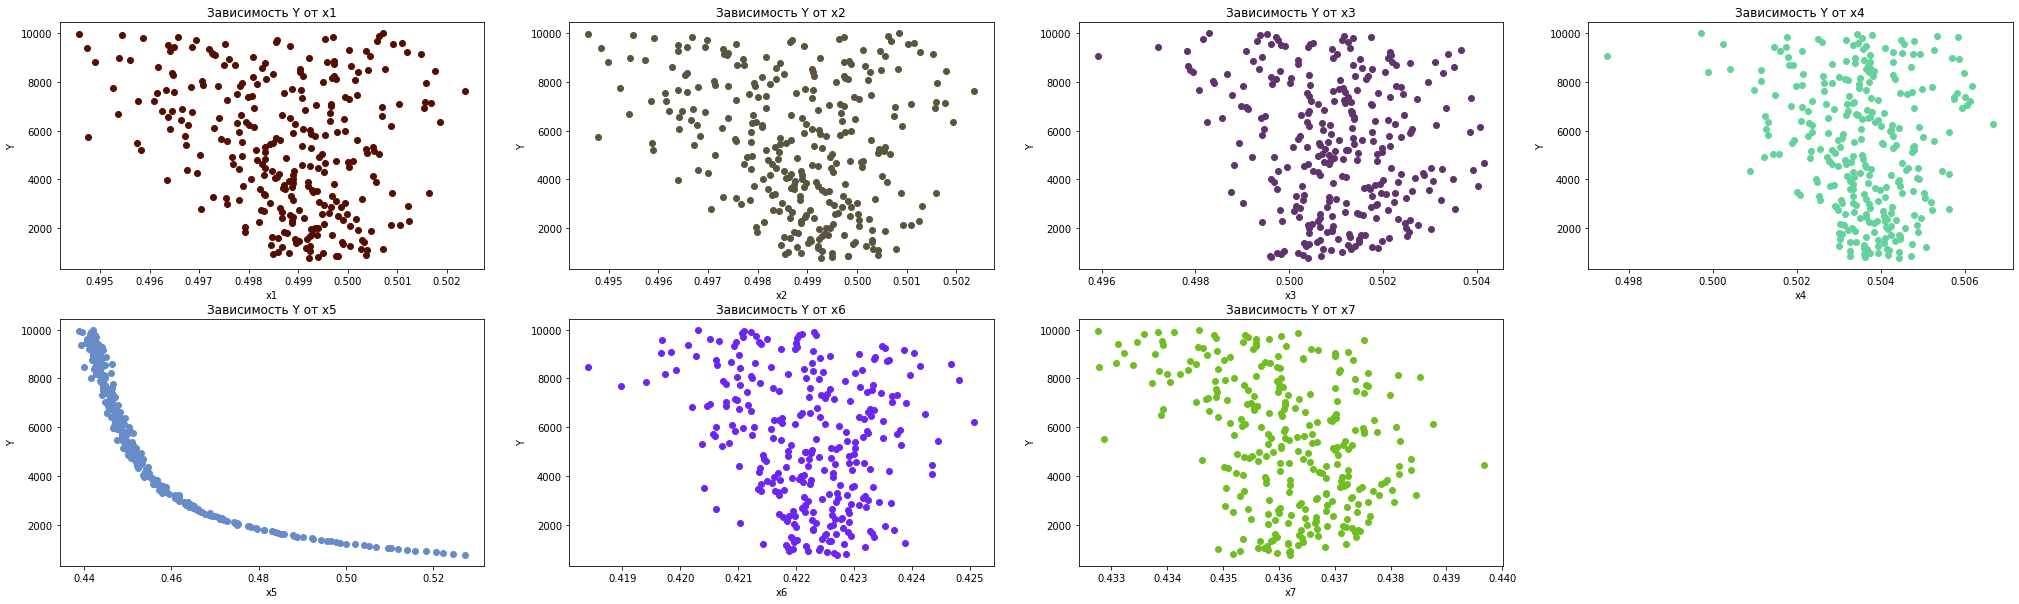

In [9]:
fig,ax = plt.subplots(2,4,figsize=(35,10))

for column,a in zip(x_cols, ax.reshape(-1)):
  a.set(title = f'Зависимость Y от {column}' , ylabel = 'Y', xlabel = column)
  a.scatter(data_base[column], data_base.y, color=(time.time()*9%0.99,time.time()*895%0.99,time.time()*95%0.99))

ax[1,3].remove()

Зависимость y от x5 явно видна, зависимость от остальных переменных сомнительна. 


Построим регрессию с помощью градиентного спуска. В качестве функции потерь используем mse. Будем использовать генератор бачей, чтобы "учиться" на группах данных.

In [10]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    for i in range(len(X)//batch_size):
        X_batch = X[perm[i*batch_size:(i+1)*batch_size]]
        y_batch = y[perm[i*batch_size:(i+1)*batch_size]]
            
        yield (X_batch,y_batch)

In [41]:
class MyRegression(object):
    def __init__(self):
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=17):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(42)
            self.w = np.random.randn(k + 1)
            np.resize(self.w,(8,1))
            self.w = self.w.reshape(8,1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        

        losses = []
        epoch=0
        while epoch < epochs:
            for X_, y_ in generate_batches(X_train, y, batch_size):
                pred = X_ @ self.w
                self.w -= lr * self.get_grad(X_, y_, pred)
                losses.append(self.__loss(y_, pred))
            epoch += 1 
        return losses

    
    def get_grad(self, X_batch, y_batch, predictions):
        wc = np.copy(self.w)
        wc[0] = 0
        grad = X_batch.T @ (predictions - y_batch)
        
        return grad

    def get_weights(self):
        return self.w

    def __loss(self, y, p):  
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

In [42]:
reg = MyRegression()
reg.fit(X, Y, epochs=10)
w = reg.get_weights()

Теперь построим графики для полученных коэффициентов

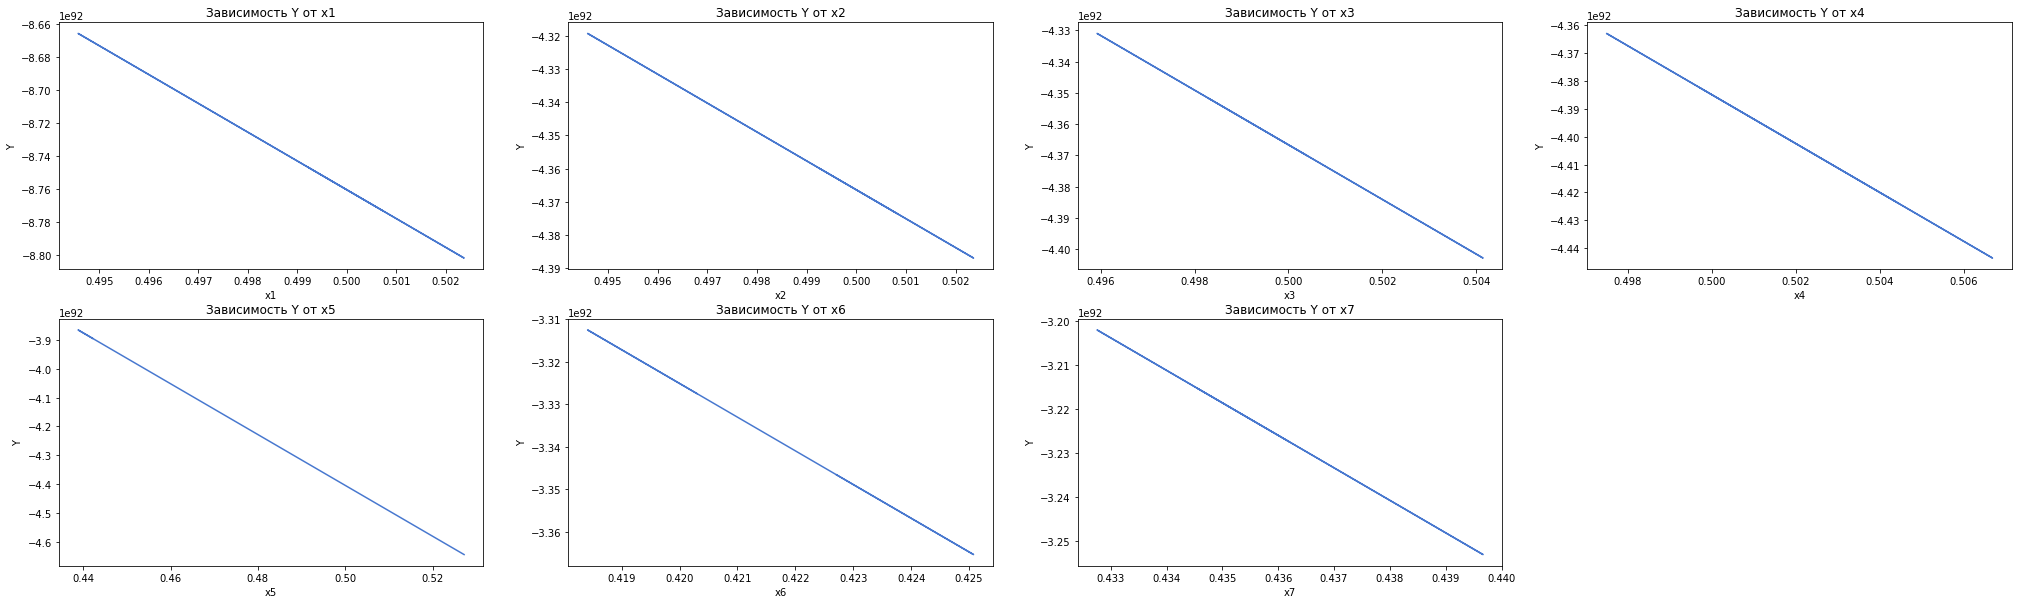

In [50]:
fig,ax = plt.subplots(2,4,figsize=(35,10))
i=0
print(w)
for column,a in zip(x_cols, ax.reshape(-1)):
  a.set(title = f'Зависимость Y от {column}' , ylabel = 'Y', xlabel = column)
  '''a.scatter(data_base[column], data_base.y, color=(time.time()*9%0.99,time.time()*895%0.99,time.time()*95%0.99))'''
  f = X[:,i:i+1] @ w[i]
  a.plot(X[:,i], f)
  i+=1

ax[1,3].remove()

# Регрессия Y на X

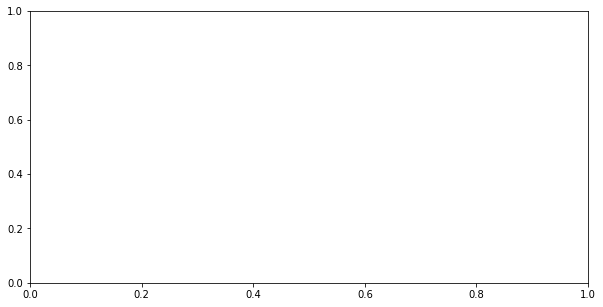

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))

